# Setting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [ ]:
train = pd.DataFrame(pd.read_csv("data\\train.csv"))
test = pd.DataFrame(pd.read_csv("data\\test.csv"))

# EDA

## Check Data Distribution

In [8]:
print("Train DataFrame Head:")
print(train.head())
print("\nTrain DataFrame Info:")
print(train.info())
print("\nTrain DataFrame Describe:")
print(train.describe())
print("\nTrain DataFrame Columns:")
print(train.columns)
print("\nTrain DataFrame Null Values:")
print(train.isnull().sum())

print("\nTest DataFrame Head:")
print(test.head())
print("\nTest DataFrame Info:")
print(test.info())
print("\nTest DataFrame Describe:")
print(test.describe())
print("\nTest DataFrame Columns:")
print(test.columns)
print("\nTest DataFrame Null Values:")
print(test.isnull().sum())

Train DataFrame Head:
   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,11504798.0,5.752398e+06,3.321149e+06,0.0,2876199.25,5752398.5,8628597.75,11504797.0
Age,11504798.0,3.838356e+01,1.499346e+01,20.0,24.00,36.0,49.00,85.0
Driving_License,11504798.0,9.980220e-01,4.443120e-02,0.0,1.00,1.0,1.00,1.0
Region_Code,11504798.0,2.641869e+01,1.299159e+01,0.0,15.00,28.0,35.00,52.0
Previously_Insured,11504798.0,4.629966e-01,4.986289e-01,0.0,0.00,0.0,1.00,1.0
Annual_Premium,11504798.0,3.046137e+04,1.645475e+04,2630.0,25277.00,31824.0,39451.00,540165.0
Policy_Sales_Channel,11504798.0,1.124254e+02,5.403571e+01,1.0,29.00,151.0,152.00,163.0
Vintage,11504798.0,1.638977e+02,7.997953e+01,10.0,99.00,166.0,232.00,299.0
Response,11504798.0,1.229973e-01,3.284341e-01,0.0,0.00,0.0,0.00,1.0


In [12]:
# Define column
less = []
for i in train.columns[1:]:
    if train[i].nunique() < 10:
        less.append(i)
        
print('Column have LESS than 10 unique values: ', less)
print('Column have MORE than 10 unique values: ', [i for i in train.columns if i not in less])

Column have LESS than 10 unique values:  ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
Column have MORE than 10 unique values:  ['id', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


## Type Change to Categorical columns for faster analysis

In [13]:
# Change to categorical columns for faster analysis:
for i in less:
    train[i] = train[i].astype('category')
    
from pandas.api.types import CategoricalDtype

# Define the new order of categories
new_categories = ['< 1 Year', '1-2 Year', '> 2 Years']

# Create a new CategoricalDtype with the desired order
new_dtype = CategoricalDtype(categories=new_categories, ordered=True)

# Update the 'Vehicle_Age' column with the new dtype
train['Vehicle_Age'] = train['Vehicle_Age'].astype(new_dtype)

In [18]:
train['Gender'].value_counts()

Gender
Male      6228134
Female    5276664
Name: count, dtype: int64

In [20]:
train['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64

In [22]:
train['Response'].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

## Visualization

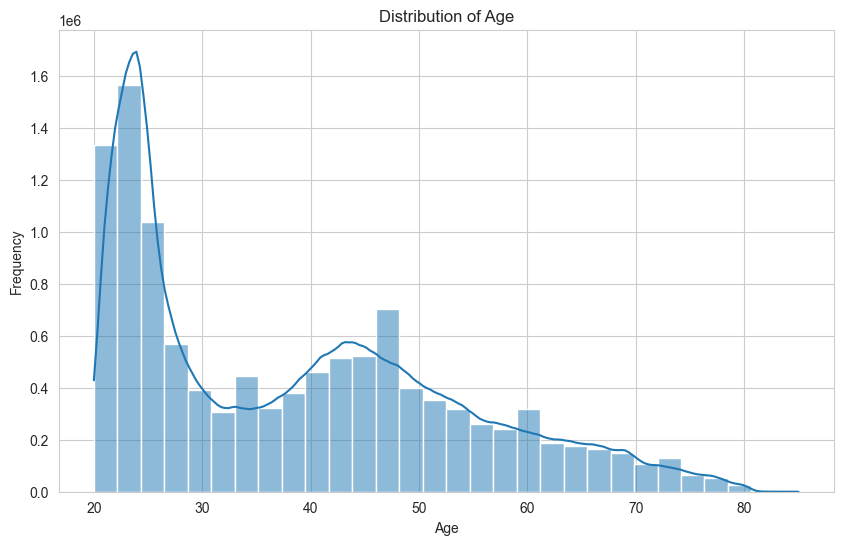

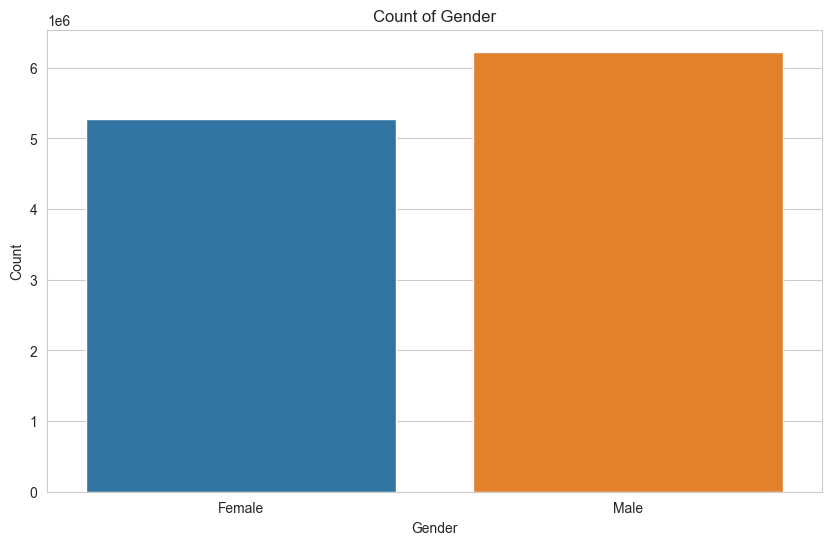

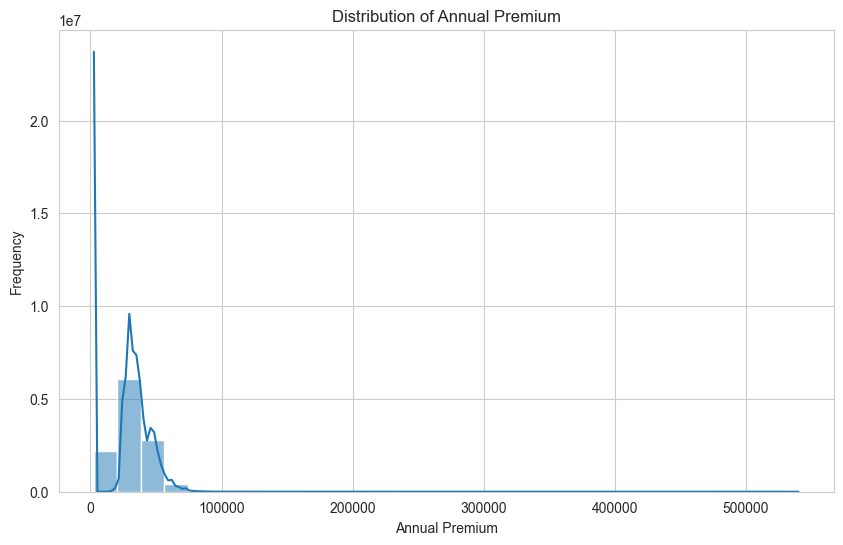

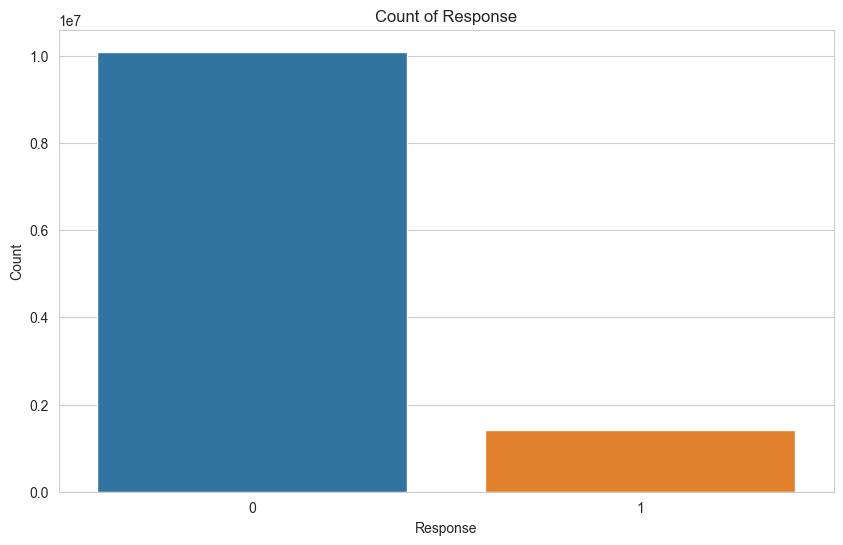

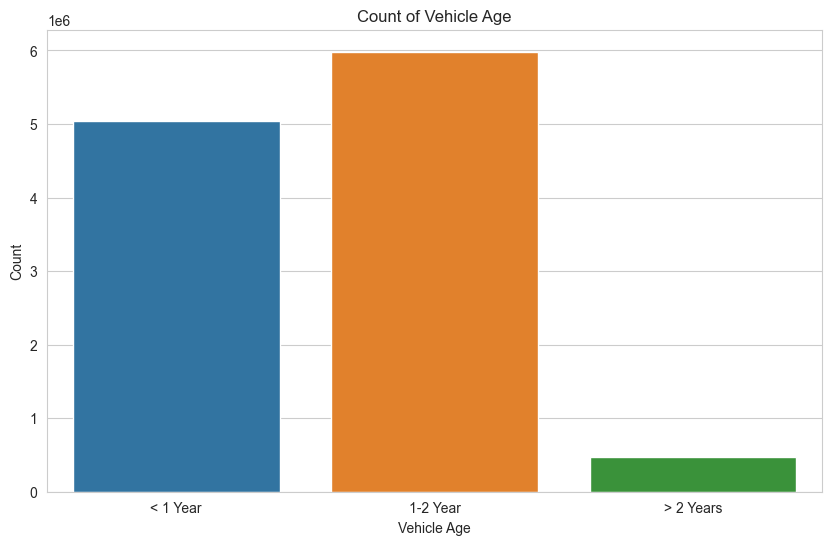

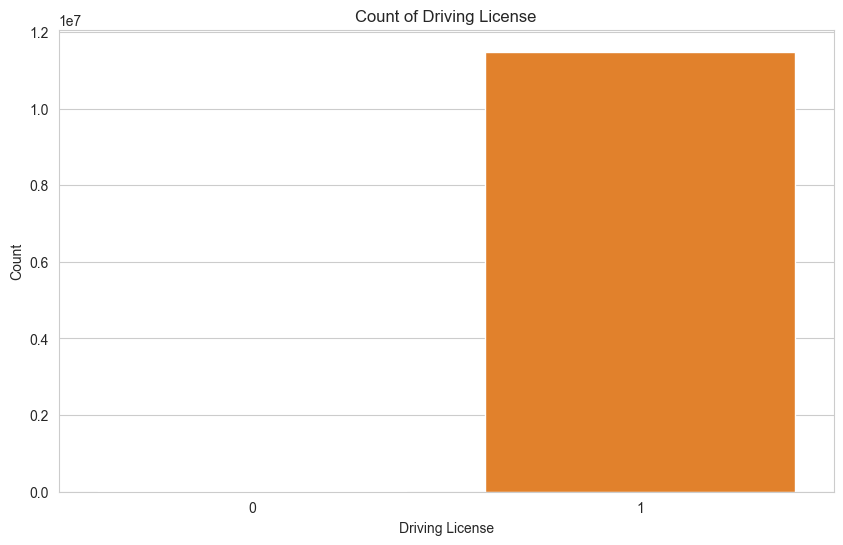

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the count of 'Gender'
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=train)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot the distribution of 'Annual_Premium'
plt.figure(figsize=(10, 6))
sns.histplot(train['Annual_Premium'], bins=30, kde=True)
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

# Plot the count of 'Response'
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', data=train)
plt.title('Count of Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

# Plot the count of 'Vehicle_Age'
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Age', data=train)
plt.title('Count of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

# Plot the count of 'Driving_License'
plt.figure(figsize=(10, 6))
sns.countplot(x='Driving_License', data=train)
plt.title('Count of Driving License')
plt.xlabel('Driving License')
plt.ylabel('Count')
plt.show()


- Imbalance of Class Data -> '_Response_' column
    - **0** (Not Response): **10,089,739**
    - **1** (Response): **1,415,059**